In [1]:
import datetime
import os
from mdagent import MDAgent
import matplotlib.pyplot as plt

In [2]:
prompt17 = "Download the pdb file for 1C3W and describe the secondary structure. Then simulate the protein at 300K for 1ns. Plot RMSD over time and radius of gyration over time."
llm_var = "gpt-4o-2024-05-13"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-07-25
time: 14:11:29
LLM:  gpt-4o-2024-05-13 
Temperature:  0.1


In [3]:
agent.run(prompt17)

Thought: To address the question, I need to perform the following steps:
1. Download the PDB file for 1C3W.
2. Describe the secondary structure of the protein.
3. Set up and run a simulation of the protein at 300K for 1ns.
4. Plot the RMSD over time.
5. Plot the radius of gyration over time.

First, I will download the PDB file for 1C3W.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1C3W"
}
```PDB file found with this ID: 1C3W


2024-07-25 14:11:33.529 
  command:

    streamlit run /Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


To proceed, I will describe the secondary structure of the protein using the downloaded PDB file (1C3W_141134). This involves computing the DSSP (secondary structure) assignment.

Action:
```
{
  "action": "ComputeDSSP",
  "action_input": {
    "traj_file": "1C3W_141134"
  }
}
```
The secondary structure of the protein 1C3W consists of 169 residues in helices, 12 residues in strands, 41 residues in coils, and 38 residues that are not assigned or not protein residues.

Next, I will set up and run a simulation of the protein at 300K for 1ns.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1C3W_141134",
    "forcefield_files": [],
    "save": true,
    "system_params": {
      "nonbondedMethod": "PME",
      "nonbondedCutoff": "1 * nanometers",
      "ewaldErrorTolerance": 0.0005,
      "constraints": "HBonds",
      "rigidWater": true,
      "constraintTolerance": 0.00001,
      "solvate": true
    },
    "integrator_params": {
      "integrator_type"

('The steps to address the question have been successfully completed. Here is the summary of the results:\n\n1. **Downloaded the PDB file for 1C3W.**\n2. **Described the secondary structure of the protein:**\n   - Helices: 169 residues\n   - Strands: 12 residues\n   - Coils: 41 residues\n   - Not assigned or not protein residues: 38 residues\n\n3. **Set up and ran a simulation of the protein at 300K for 1ns.**\n4. **Plotted the RMSD over time.**\n   - RMSD plot saved with plot ID: fig0_195709\n\n5. **Plotted the radius of gyration over time.**\n   - Radius of gyration plot saved with plot ID: fig0_195802\n\nFinal Answer:\nThe secondary structure of the protein 1C3W consists of 169 residues in helices, 12 residues in strands, 41 residues in coils, and 38 residues that are not assigned or not protein residues. The simulation of the protein at 300K for 1ns was successfully completed. The RMSD over time and the radius of gyration over time were plotted and saved. The plots can be found wit

In [4]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

date and time: 2024-07-25
time: 19:58:13
Files found in registry: 1C3W_141134: PDB file downloaded from RSCB
 PDBFile ID: 1C3W_141134
 rec0_141137: dssp values for trajectory with id: 1C3W_141134
 1C3W_141151: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_141156: Initial positions for simulation sim0_141156
 sim0_141156: Basic Simulation of Protein 1C3W_141151
 rec0_141200: Simulation trajectory for protein 1C3W_141151 and simulation sim0_141156
 rec1_141200: Simulation state log for protein 1C3W_141151 and simulation sim0_141156
 rec2_141200: Simulation pdb frames for protein 1C3W_141151 and simulation sim0_141156
 rmsd_141156: RMSD for 141156
 fig0_195709: RMSD plot for 141156
 /Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_282/figures/radii_of_gyration_1C3W.csv: Radii of gyration per frame for 1C3W
 fig0_195802: Plot of radii of gyration over time for 1

In [6]:
traj_path_1 = registry.get_mapped_path("rec0_141200") 
top_path_1 = registry.get_mapped_path("top_sim0_141156")

fig_path_1 = registry.get_mapped_path("fig0_195709")
fig_path_2 = registry.get_mapped_path("fig0_195802") 

assert os.path.exists(traj_path_1)
assert os.path.exists(top_path_1)
assert os.path.exists(fig_path_1)
assert os.path.exists(fig_path_2)


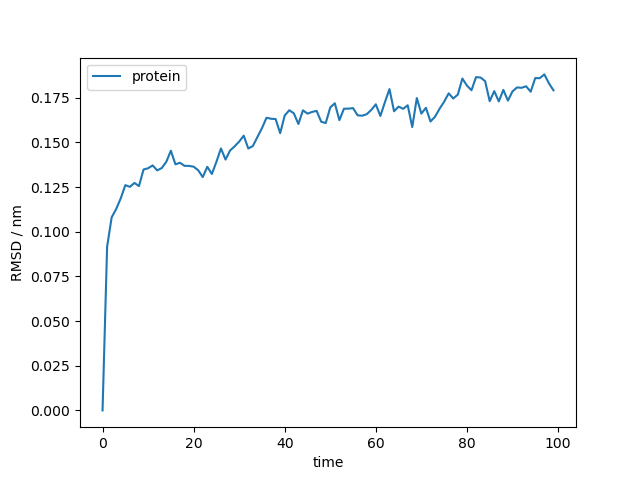

In [7]:
from IPython.display import Image
Image(filename=fig_path_1)

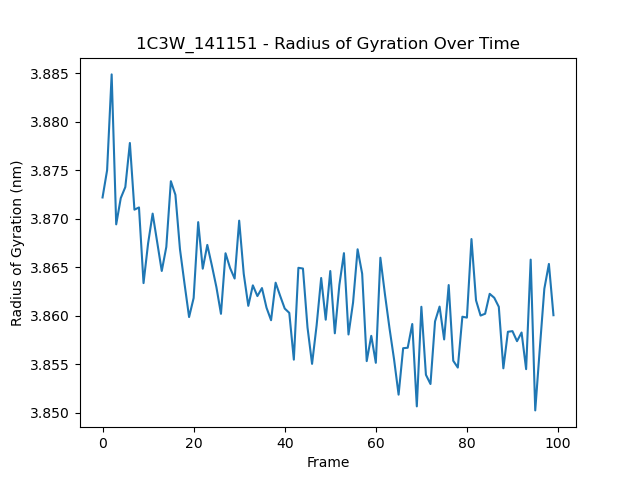

In [8]:
Image(filename=fig_path_2)

# Experiment Result:
### Completed without Exception or TimeOut Errors ✅
### Attempted all necessary steps ✅
### No Hallucination ✅
### Logic make sense ✅
### Correct Answer  ✅